> Name: 張宸愷
> ID: 0710018

   school_GP  school_MS  sex_F  sex_M  address_R  address_U  famsize_GT3  \
0          1          0      1      0          0          1            1   
1          1          0      1      0          0          1            1   
2          1          0      1      0          0          1            0   
3          1          0      1      0          0          1            1   
4          1          0      1      0          0          1            1   

   famsize_LE3  Pstatus_A  Pstatus_T  ...  famrel  freetime  goout  Dalc  \
0            0          1          0  ...       4         3      4     1   
1            0          0          1  ...       5         3      3     1   
2            1          0          1  ...       4         3      2     2   
3            0          0          1  ...       3         2      2     1   
4            0          0          1  ...       4         3      2     1   

   Walc  health  absences  G1  G2    G3  
0     1       3         6   5   6  fail  
1 

[Text(1144.8863636363635, 1415.625, 'G2 <= 10.5\ngini = 0.498\nsamples = 264\nvalue = [124, 140]\nclass = fail'),
 Text(704.5454545454545, 1226.875, 'G1 <= 11.5\ngini = 0.131\nsamples = 128\nvalue = [119, 9]\nclass = pass'),
 Text(528.4090909090909, 1038.125, 'famrel <= 4.5\ngini = 0.091\nsamples = 125\nvalue = [119, 6]\nclass = pass'),
 Text(352.27272727272725, 849.375, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = pass'),
 Text(704.5454545454545, 849.375, 'age <= 15.5\ngini = 0.278\nsamples = 36\nvalue = [30, 6]\nclass = pass'),
 Text(352.27272727272725, 660.625, 'absences <= 6.0\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = fail'),
 Text(176.13636363636363, 471.875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = fail'),
 Text(528.4090909090909, 471.875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = pass'),
 Text(1056.8181818181818, 660.625, 'studytime <= 3.5\ngini = 0.124\nsamples = 30\nvalue = [28, 2]\nclass = pass'),
 Text(880.6818181818181, 471.875, 'nursery_no

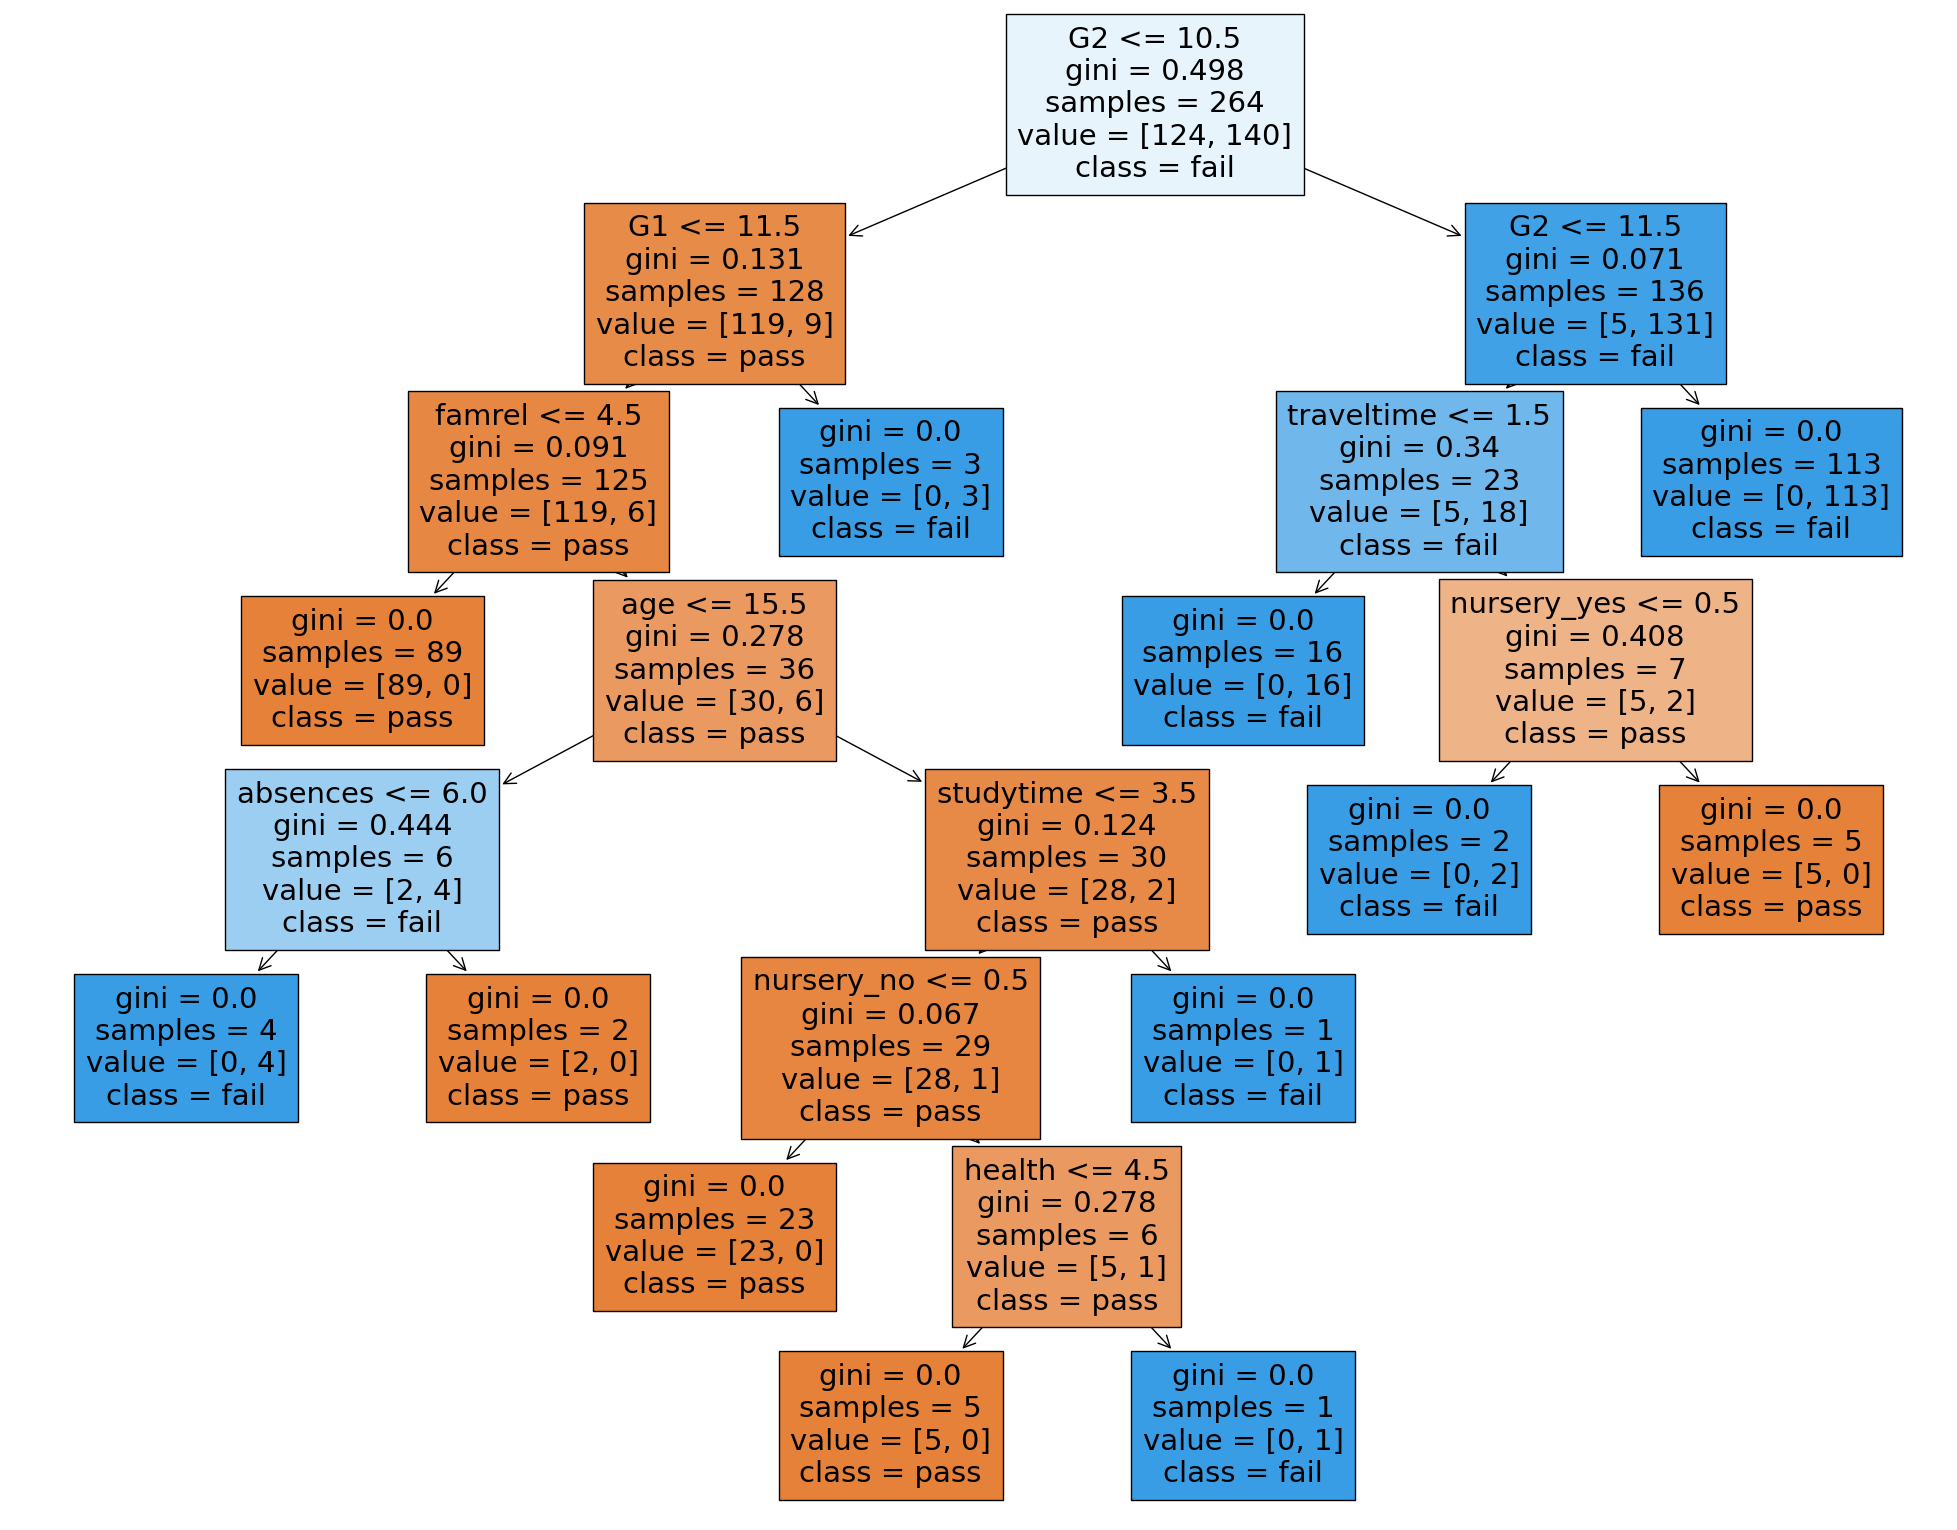

In [50]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

#-------------------------#
# Some parameters
PCA = True
bin_5_classf = 0


#-------------------------#

df = pd.read_csv("data/student-mat.csv", sep=";")  # read csv. I used the
# mathematics dataset


cats = df.select_dtypes(include=[object])  # select categorical features
num = df.select_dtypes(include=[int])  # select numerical features
cats = pd.get_dummies(cats)  # onehot encode

# combine numerical and categorical data
data_orig = pd.concat([cats, num], axis=1)

if bin_5_classf == 0:

    data_orig['G3'] = data_orig['G3'].apply(
        lambda x: "pass" if x > 10 else "fail")

elif bin_5_classf == 1:
    num["G3"] = []


data = data_orig.to_numpy()  # get the binary classification data
# np.random.shuffle(data)

print(data_orig.head())


def single_run(training: np.ndarray, validation: np.ndarray):
    T_cls = tree.DecisionTreeClassifier()
    X_train, y_train = training[:, 0:58], training[:, 58]
    X_test, y_test = validation[:, 0:58], validation[:, 58]
    T_cls.fit(X_train, y_train)
    y_pred = T_cls.predict(X_test)
    r = classification_report(y_test, y_pred, output_dict=True)
    
    return r, None, T_cls


kfold = KFold(n_splits=3, shuffle=True)
T_cls = None
for train_index, test_index in kfold.split(data[:, 0:58], data[:, 58]):
    r, confm, T_cls = single_run(data[train_index], data[test_index])
    print(r)



fig = plt.figure(figsize=(25, 20), dpi=100)
tree.plot_tree(T_cls, feature_names=data_orig.columns,
                      class_names=['pass', 'fail'],
                       filled=True)

